**Υπολογιστική Γεωμετρία** <br>
Ελένη Λιάρου<br>
1115201900100<br>

# Υλοποίηση 1: Κυρτό Περίβλημα σε 2D και 3D<br>






## 1.   Εύρεση κυρτού περιβλήματος στο επίπεδο (2Δ) με τους εξής αλγορίθμους:


  *   Αυξητικό αλγόριθμο
  *   Αλγόριθμο περιτυλίγματος
  *   Αλγόριθμο Διαίρει και Βασίλευε
  *   Αλγόριθμο QuickHull  





In [22]:
import sys
import time 
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.spatial import ConvexHull, convex_hull_plot_2d#to implement QuickHull
from math import sqrt, pow, atan2, pi, degrees
import random

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __str__(self):
        return '(' + str(self.x) + ', ' + str(self.y) + ')'

    def getX(self):
        return self.x

    def getY(self):
        return self.y


In [23]:
def CCW(p0, p1, p2):
  if (p1[0]-p0[0])*(p2[1]-p0[1]) - (p1[1]-p0[1])*(p2[0]-p0[0])>0:
    return 1
  return -1

def CW(p0, p1, p2):
  if (p1[0]-p0[0])*(p2[1]-p0[1]) - (p1[1]-p0[1])*(p2[0]-p0[0])<0:
    return 1
  return -1

def collinear(p0,p1,p2):
  if (p1[0]-p0[0])*(p2[1]-p0[1]) - (p1[1]-p0[1])*(p2[0]-p0[0])==0:
    return 1
  return -1

def orientation(p0,p1,p2):  # calculates orientation of segment (a,b) based on segment (b,c) where a,b,c are points

    # if orientation > 0, the angle between the segments is 0 < angle < 180
    # if orientation < 0, the angle between the segments is 180 < angle < 360
    # if orientation is 0, the angle between the segments is k*180

    return (p1[1]-p0[1])*(p2[0]-p1[0]) - (p2[1]-p1[1])*(p1[0]-p0[0])


#find point with smallest x and y coordinate from a Set of points, used by giftwrapping algo 
def LeftmostPoint(S):
  index = 0;
  for i in range(1,len(S)):
      if S[i].x < S[index].x:
          index = i
      elif S[i].x == S[index].x:
          if S[i].y < S[index].y:
              index = i
  return index

#find point with smallest x and y coordinate from a Set of points, used by divide n conquer
def LeftmostPointDivide(S):
  index = 0;
  for i in range(1,len(S)):
      if S[i][0] < S[index][0]:
          index = i
      elif S[i][0] == S[index][0]:
          if S[i][1] < S[index][1]:
              index = i
  return index

#find point with biggest x and y coordinate from a Set of points, used by divide n conquer
def RightmostPoint(S):
  index = 0;
  for i in range(1,len(S)):
      if S[i][0] > S[index][0]:
          index = i
      elif S[i][0] == S[index][0]:
          if S[i][1] > S[index][1]:
              index = i
  return index


#incremental using graham scan for 2D
def Incremental(P):
  P.sort()
  Lupper = [P[0], P[1]]
  for i in range(2, len(P)):
    Lupper.append(P[i])
    while(len(Lupper)>2 and CW(Lupper[-1], Lupper[-2], Lupper[-3])==-1):
      del Lupper[-2]
  Llower = [P[-1], P[-2]]
  for i in range(len(P)-3, -1,-1):
    Llower.append(P[i])
    while(len(Llower)>2 and CW(Llower[-1], Llower[-2], Llower[-3])==-1):
      del Llower[-2]

  del Llower[0]
  del Llower[-1]
  Lfinal = Llower+Lupper 

  return np.array(Lfinal)


#gift wrapping for 2D
def GiftWrapping(S):
  n = len(S)
  CH = []
  allPoints = []
  for i in range(len(S)):
    allPoints.append(Point(S[i][0], S[i][1]))
  index_r0 = LeftmostPoint(allPoints)
  r0 = S[index_r0]
  i = 2
  r = r0
  index_u=0
  index_r = index_r0
  CH.append(r)
  totalIter=0

  while(True):
    index_u = (index_u + 1) % n
    u = S[0]
    for j in range(n):
      if j == index_r0:
        continue
      t = S[j]
      if ((collinear(r,u,t)==1 and  (math.dist(r, t) > math.dist(r, u))) or CW(r,u,t)==1):
        u = t
        index_u = j
    r = u
    index_r = index_u
    if (u[0] == r0[0] and u[1]==r0[1]):
      break
    CH.append(r)
    print("Printing CH after " + str(totalIter+1) + " iteration of Giftwrapping algo")
    plotCH(np.array(CH), np.array(S), 2)
    totalIter +=1 

  return np.array(CH)


#quickhull for 2D
def QuickHull(S):
  CH = ConvexHull(S)#used ConvexHull function from SciPy library
  return CH

#helper functions used by Divide n Conquer algo
def merge(CH1, CH2):
  n1 = len(CH1)
  n2 = len(CH2)

  #find rightmost point of CH1
  l1 = RightmostPoint(CH1)
  #find left point of CH2
  l2 = LeftmostPointDivide(CH2)

  #find upper tangent(bridge)
  uppertangent = (CH1[l1], CH2[l2])
  j = l1
  i = l2

  done = 0
  while not done:
      done = 1
    
      #while it is not tangent to right polygon
      while(orientation(uppertangent[0], uppertangent[1], CH2[(i + 1) % n2]) <= 0):
        i = (i + 1) % n2
        uppertangent = (uppertangent[0], CH2[i])

      #while it is not tangent to left polygon
      while(orientation(uppertangent[1], uppertangent[0], CH1[(j - 1) % n1]) >= 0):
        done = 0 
        j = (j - 1) % n1
        uppertangent = (CH1[j], uppertangent[1])
      
      
  upper1 = j
  upper2 = i

  #find lower tangent(bridge)
  lowertangent = (CH1[l1], CH2[l2])
  j = l1
  i = l2

  done = 0
  while not done:
      done = 1
      #while it is not tangent to right polygon
      while(orientation(lowertangent[0], lowertangent[1], CH2[(i - 1) % n2]) >= 0):
        i = (i - 1) % n2
        lowertangent = (lowertangent[0], CH2[i])
      
      #while it is not tangent to left polygon
      while(orientation(lowertangent[1], lowertangent[0], CH1[(j + 1) % n1]) <= 0):
        done = 0 
        j = (j + 1) % n1
        lowertangent = (CH1[j], lowertangent[1])
      
      
  lower1 = j
  lower2 = i

  #merge the 2 CH
  merged = []
  merged.extend([uppertangent[0], uppertangent[1]])

  if upper2 != lower2:
      k = (upper2+1) % n2
      while k != lower2:
        merged.append(CH2[k])
        k = (k + 1) % n2
 
  if upper2 != lower2:  
    if lower1 != upper1: 
      merged.extend([lowertangent[1], lowertangent[0]])
    else:
      merged.append(lowertangent[1])
  else: 
    if lower1 != upper1:  
      merged.append(lowertangent[0])

  if lower1 != upper1:
      
      w = (lower1 + 1) % n1
      while w != upper1:
        merged.append(CH1[w])
        w = (w + 1) % n1


  return merged

def vectorize(edge):  
    (a, b) = edge
    vector = Point(
        b.x - a.x,
        b.y - a.y,)
    vector_len = sqrt(pow(vector.x, 2) + pow(vector.y, 2))
    vector = Point(vector.x / vector_len, vector.y / vector_len)
    return vector


def clockwise_angle(center, pt):  
    a = Point(center.getX(), center.getY())
    b = Point(pt[0], pt[1])
    if a.x == b.x and a.y == b.y:  
        return 0

    base_vector = Point(0, 1)  

    vector = vectorize((a,b))  

    # calculate angle
    dot = vector.x * base_vector.x + vector.y * base_vector.y  
    det = vector.x * base_vector.y - vector.y * base_vector.x  
    angle = atan2(det, dot)

    if angle < 0:  
        angle =  2 * pi + angle
    elif angle > 2 * pi:  
        angle = angle - 2 * pi

    return degrees(angle)

def clockwise_sort(S):  # sorts clockwise a set of points
    
    x = []
    for point in S:
        x.append(point[0])
    x_avg = sum(x) / len(x)
    

    y = []
    for point in S:
        y.append(point[1])
    y_avg = sum(y) / len(y)
    center = Point(x_avg,y_avg)
    # sort points clockwise around center
    S2 = set(S)
    return sorted(S2, key=lambda pt: clockwise_angle(center, pt))  # returns sorted list() from input set()


#use exhaustive search algorithm
def bruteHull(S):

  polygon = []
  for p0 in S:
    for p1 in S:
      if p0 == p1:
        continue
      flag = 1
      for p2 in S:
        if p2 == p0 or p2 == p1:
          continue
        if CCW(p0, p1, p2) == 1:
          flag=0
      if flag == 1:
        polygon.append(p0)  
        polygon.append(p1)
          
  
  polygon = clockwise_sort(polygon)  
  return np.array(polygon)

  

#DividenConquer for 2D
def DivideNConquer(S):
  
  S.sort() #sort on x coordinate
  n = len(S)

  #base case create CH using brute force
  if n <= 5:
    return bruteHull(S)#i implement the exhaustive algorithm that computes Ch when we have less than 6 points
  Sleft = []
  Sright = []

  #divide S into 2 subsets Sleft,Sright
  start = int(len(S)/2)
  for i in range(start):
      Sleft.append(S[i])
  for i in range(start, n):
      Sright.append(S[i])

  #compute CH of the subsets
  if len(Sleft) != 0:
      CHleft = DivideNConquer(Sleft)
  if len(Sright) != 0:
      CHright = DivideNConquer(Sright)
      
  # merge the convex hulls
  if len(Sleft) != 0 and len(Sright) != 0:  # if point sets are not empty
      return np.array(merge(CHleft, CHright))
  elif len(Sleft) == 0:  # if only the second point set isn't empty then return polygon 2
      return np.array(CHright)
  else:
      return np.array(CHleft)

#plot 2D CH
def plotCH(CH, S, type):
  plt.figure()
  if type==1:
    plt.title('Convex Hull using Incremental for 2D')
  elif type==2:
    plt.title('Convex Hull using Gift-Wrapping for 2D')
  elif type==4:
    plt.title('Convex Hull using Divide n Conquer for 2D')
  elif type==3:
    plt.title('Convex Hull using QuickHull for 2D')
    plt.plot(S[:,0], S[:,1], '.b')
    for simplex in CH.simplices:
      plt.plot(S[simplex, 0], S[simplex, 1], 'm-')
    plt.show()
    return
  plt.plot(CH[:,0], CH[:,1], 'm-', lw=2)
  plt.plot([CH[-1,0],CH[0,0]],[CH[-1,1],CH[0,1]], 'm-')
  plt.plot(S[:,0], S[:,1], '.b', lw=2)
  plt.show()
  return
  
  



Incremental Graham-Scan did 0.00029540061950683594 seconds
The points of the convex Hull generated by incremental algorithm are 
[[196.38430607 199.45236291]
 [ 11.43930308 190.74439117]
 [  9.44357978 178.5803452 ]
 [  2.12846628  24.56651407]
 [  5.52631225   6.06470988]
 [154.7467813    0.81251176]
 [176.42323923   7.0819717 ]
 [179.90837866   8.65561057]
 [199.7787581   37.15097603]]


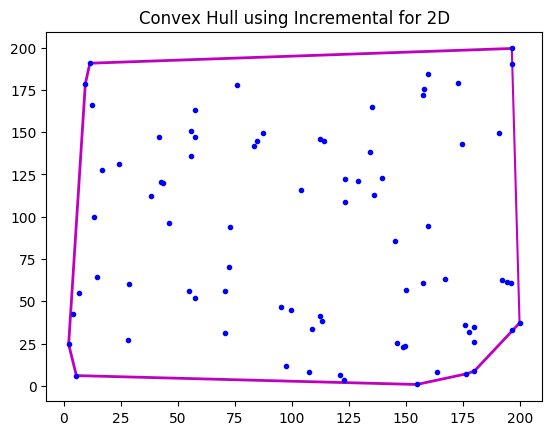

Printing CH after 1 iteration of Giftwrapping algo


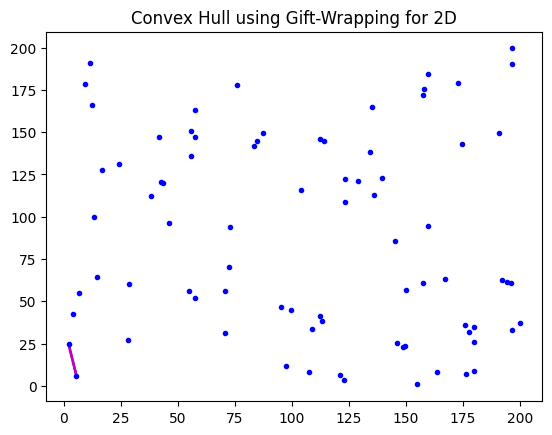

Printing CH after 2 iteration of Giftwrapping algo


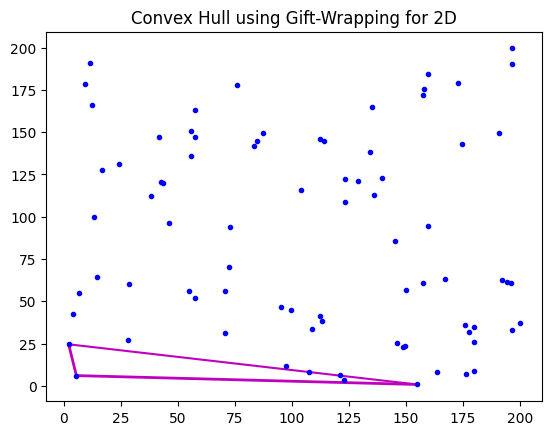

Printing CH after 3 iteration of Giftwrapping algo


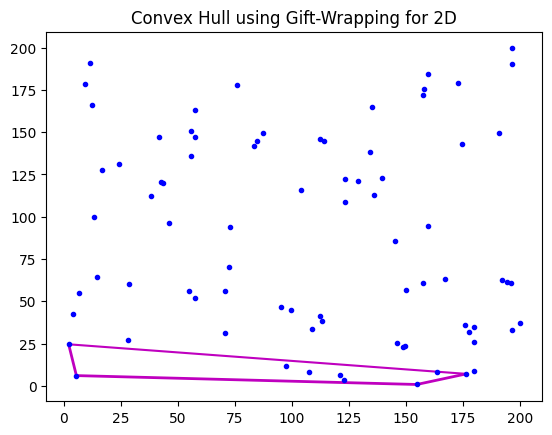

Printing CH after 4 iteration of Giftwrapping algo


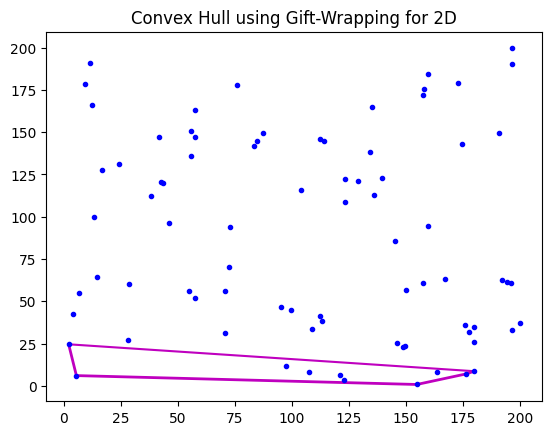

Printing CH after 5 iteration of Giftwrapping algo


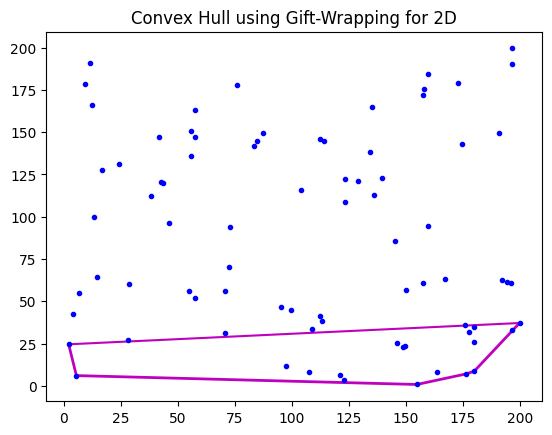

Printing CH after 6 iteration of Giftwrapping algo


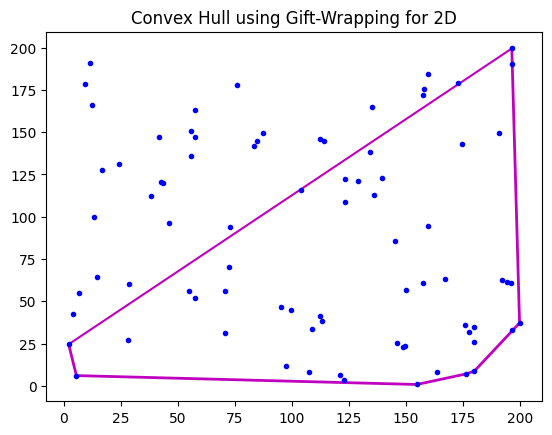

Printing CH after 7 iteration of Giftwrapping algo


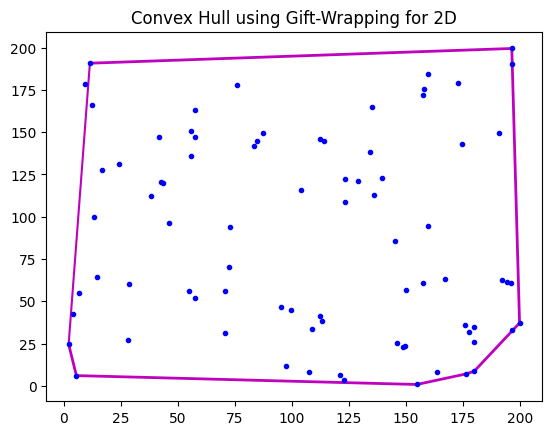

Printing CH after 8 iteration of Giftwrapping algo


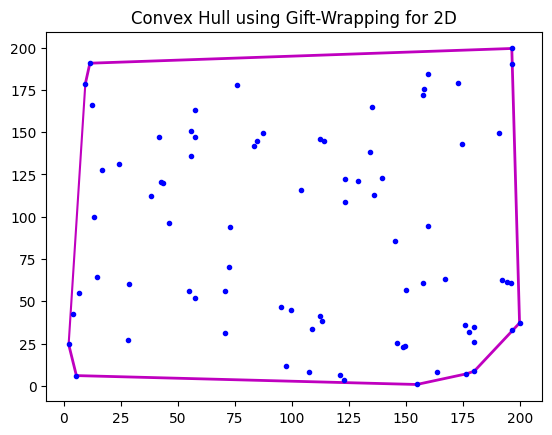

GiftWrapping did 1.6088225841522217 seconds
The points of the convex Hull generated by gift-wrapping algorithm are 
[[  2.12846628  24.56651407]
 [  5.52631225   6.06470988]
 [154.7467813    0.81251176]
 [176.42323923   7.0819717 ]
 [179.90837866   8.65561057]
 [199.7787581   37.15097603]
 [196.38430607 199.45236291]
 [ 11.43930308 190.74439117]
 [  9.44357978 178.5803452 ]]


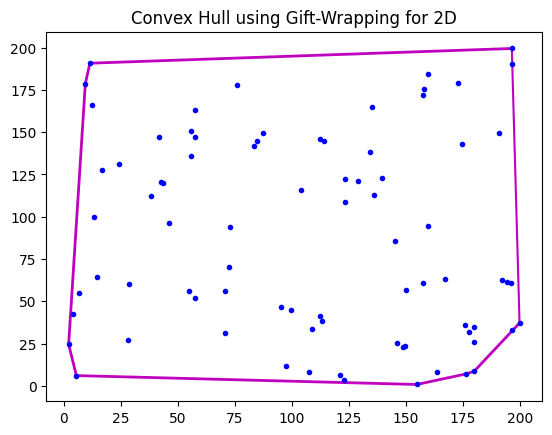

QuickHull did 0.0014081001281738281 seconds
The points of the convex Hull generated by quickhull algorithm are 
[[199.7787581   37.15097603]
 [196.38430607 199.45236291]
 [ 11.43930308 190.74439117]
 [  9.44357978 178.5803452 ]
 [  2.12846628  24.56651407]
 [  5.52631225   6.06470988]
 [154.7467813    0.81251176]
 [176.42323923   7.0819717 ]
 [179.90837866   8.65561057]]


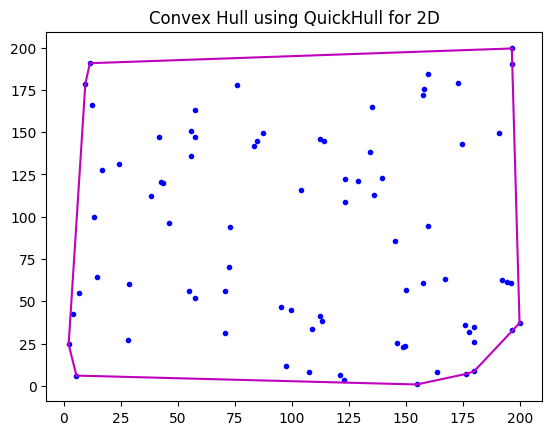

Divide and Conquer did 0.003747701644897461 seconds
The points of the convex Hull generated by  Divide n Conquer algorithm are 
[[ 11.43930308 190.74439117]
 [196.38430607 199.45236291]
 [199.7787581   37.15097603]
 [179.90837866   8.65561057]
 [176.42323923   7.0819717 ]
 [154.7467813    0.81251176]
 [  5.52631225   6.06470988]
 [  2.12846628  24.56651407]
 [  9.44357978 178.5803452 ]]


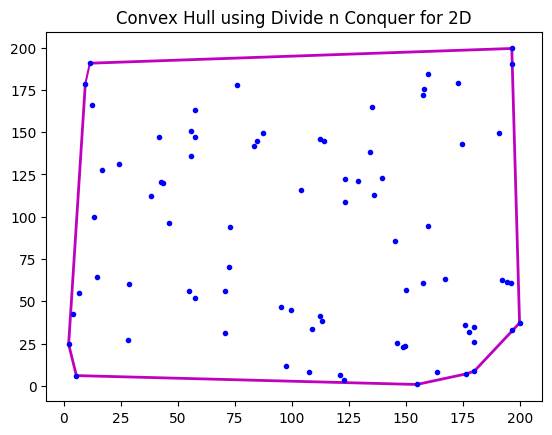

In [24]:
def main():

  N = 80
  L = [(np.random.uniform(0,200),np.random.uniform(0,200)) for i in range(N)]
  L2 = L  

  #use incremental for 2D to construct CH
  t0 = time.time()
  CH_incr = Incremental(L)
  t1 = time.time()
  print("Incremental Graham-Scan did " + str(t1-t0) + " seconds")
  print("The points of the convex Hull generated by incremental algorithm are ")
  print(CH_incr)
  L=np.array(L)
  plotCH(CH_incr,L, 1)

  #use Gift-Wrapping for 2D to construct CH
  t0 = time.time()
  CH_gift = GiftWrapping(L)
  t1 = time.time()
  print("GiftWrapping did " + str(t1-t0) + " seconds")
  print("The points of the convex Hull generated by gift-wrapping algorithm are ")
  print(CH_gift)
  L=np.array(L)
  plotCH(CH_incr,L, 2)

  #use QuickHull for 2D to construct CH
  t0 = time.time()
  CH_quick = QuickHull(L)
  t1 = time.time()
  print("QuickHull did " + str(t1-t0) + " seconds")
  print("The points of the convex Hull generated by quickhull algorithm are ")
  print(L[CH_quick.vertices])
  L=np.array(L)
  plotCH(CH_quick,L, 3)

  #use Divide n Conquer for 2D to construct CH
  t0 = time.time()
  CH_divide = DivideNConquer(L2)
  t1 = time.time()
  print("Divide and Conquer did " + str(t1-t0) + " seconds")
  print("The points of the convex Hull generated by  Divide n Conquer algorithm are ")
  print(CH_divide)
  L2=np.array(L2)
  plotCH(CH_divide,L2, 4)

if __name__ == '__main__':
  main()


## 2.   Πώς συμπεριφέρονται οι παραπάνω αλγόριθμοι σε εκφυλισμένες περιπτώσεις;



 **Σύγκριση αλγορίθμων** <br>

Όλοι οι αλγόριθμοι υπολογίζουν πάντα το βέλτιστο κυρτό περίβλημα ανεξαρτήτως του πλήθος των σημείων. Για μέχρι και 10.000 σημεία δεν παρατηρούμε σημαντικές διαφορές στον χρόνο εκτέλεσης των αλγορίθμων. Αν όμως βάλουμε > 50.000 σημεία τότε είναι εμφανές ότι ο Giftwrapping αλγόριθμος είναι πιο αργός από όλους. O αυξητικός και ο QuickHull όσα σημεία και αν επιλέξουμε είναι σταθερά οι πιο γρήγοροι. Για παράδειγμα για 100.000 σημεία ο incremental και ο quickhull εμφανίζουν αποτελέσματα σε κάτω από 1 δευτερόλεπτο, ενώ ο Giftwrapping απαιτεί 10 δευτερόλεπτα και ο Divide and Conquer 3.5 δευτερόλεπτα. <br>
Τα αποτελέσματα αυτά είναι σύμφωνα και με τις πολυπλοκότητες που αναφέραμε στο μάθημα. <br>
Incremental(Graham Scan): $Ο(nlogn)$, Giftwrapping: $Ο(nh)$, QuickHull: $Ο(nlogn)$, Divide and Conquer: $Ο(nlogn)$


## 3.   Υλοποίηση κυρτού περιβήματος σε 3Δ με χρήση του αυξητικού αλγορίθμου



In [2]:
import sys
import time 
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from math import sqrt, pow, atan2, pi, degrees
import random
import plotly.graph_objects as go
import itertools, math, numpy as np

class Point:
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
    
    def __str__(self):
        return '(' + str(self.x) + ', ' + str(self.y) + ', '+ str(self.z) +')'

def endpoint_key(*arg):
    t = [str(a) for a in sorted(arg)]
    return '-'.join(t)


class Edge():
    def __init__(self, p0, p1):
        self.p0 = p0
        self.p1 = p1
        self.adj_faces = []

    def add_adjacent_face(self, f):
        self.adj_faces.append(f)

        if len(self.adj_faces) > 2:
            print('WARNING: edge(%s): non-manifold edge' % endpoint_key(self.p0, self.p1))

    def remove_adjacent_face(self, f):
        if len(self.adj_faces) == 0:
            print('WARNING: edge(%s): no adjacent face to remove' % endpoint_key(self.p0, self.p1))
            return

        self.adj_faces.remove(f)


class Face():
    def __init__(self, vtx):
        self.vertices = vtx

        if len(self.vertices) > 3:
            print('WARNING: face(%s): non-triangular face' % endpoint_key(*self.vertices))


In [10]:
def cross(p0, p1):
  cr = Point(p0[1] * p1[2] - p0[2] * p1[1], p0[2] * p1[0] - p0[0] * p1[2], p0[0] * p1[1] - p0[1] * p1[0])
  return cr

def sub(p0, p1):
  return Point(p0[0] - p1[0], p0[1] - p1[1], p0[2] - p1[2])

def dot(p0, p1):
  return p0[0] * p1[0] +  p0[1] * p1[1] + p0[2] * p1[2]

class pair_index():
  def __init__(self):
        self.i1 = -1
        self.i2 = -1

  def insert(self, a):
    if(self.i1 == -1):
      self.i1 = a;
    else:
      self.i2 = a;

  def remove(self, a):
    if(self.i1 == a):
      self.i1 = -1;
    elif (self.i2 == a):
      self.i2 = -1;
  
  def num_ver(self):
    a = 0;
    if(self.i1 != -1):
        a+=1
    if(self.i2 != -1):
        a+=1
    return a;

edge_to_face = [[pair_index() for j in range(101)] for i in range(101)]

class Face2():
  def __init__(self, in0, in1, in2, L, in3):
    self.p0 = in0
    self.p1 = in1
    self.p2 = in2
    self.normal = cross(sub(L[in1], L[in0]) , sub(L[in2], L[in0]))#(P1-P0)X(P2-P0)
    self.dfo = dot(self.normal, L[in0])
        
    if(dot(self.normal, L[in3]) > self.dfo):
        self.normal.x *= -1
        self.normal.y *= -1
        self.normal.z *= -1

  def add_face(self,  p0,  p1,  p2,  p3, L):
    edge_to_face[p0][p1].append(p2)
    edge_to_face[p1][p0].append(p2)
    edge_to_face[p1][p2].append(p0)
    edge_to_face[p2][p1].append(p0)
    edge_to_face[p0][p2].append(p1)
    edge_to_face[p2][p0].append(p1)
    
    newf = Face2(p0, p1, p2, L,p3);
    return newf;


    
        
class CH():
  def __init__(self, L):
    self.faces = []
    self.vertices = L
    self.initialize_hull(L)
    self.computeCH()

  def initialize_hull(self, L):
    for i in range(4):
      for j in range(i + 1, 4):
        for k in range(j + 1, 4):
          print(L)
          self.faces.append(Face2.add_face(i, j, k, 6 - i - j - k, L))

  def compute_CH(self):
    for i in range(4, len(self.vertices)):
      while j < len(self.faces):
          f = self.faces[j]
          if(dot(f.normal, self.vertices[i]) > f.dfo):
            edge_to_face[f.p0][f.p1].remove(f)
            edge_to_face[f.p1][f.p0].remove(f)
            edge_to_face[f.p0][f.p2].remove(f)
            edge_to_face[f.p2][f.p0].remove(f)
            edge_to_face[f.p2][f.p1].remove(f)
            edge_to_face[f.p1][f.p2].remove(f)
            self.faces[j] = self.faces[-1]
            self.faces.pop()
          else:
            j+=1
      num_f = len(self.faces)
      j=0
      while j < num_f:
        f = self.faces[j]
        if len(edge_to_face[f.p0][f.p1]) != 2:
          self.faces.append(Face2.add_face(f.p0, f.p1, i, f.p2, self.vertices))
        if len((edge_to_face[f.p0][f.p2]) != 2):
          self.faces.append(Face2.add_face(f.p0, f.p2, i, f.p1, self.vertices))
        if len((edge_to_face[f.p1][f.p2]) != 2):
          self.faces.append(Face2.add_face(f.p1, f.p2, i, f.p0, self.vertices))

    final_points = []
    for i in range(len(self.vertices)):
        v = self.vertices[i];
        for j in range(len(self.faces)):
            d = self.faces[j].dfo - dot(self.faces[j].normal, v)
            if(d == 0):
                final_points.append(self.vertices[i])
                break
    return final_points

  


def CCW3(p0, p1, p2, p3):
  temp = [[1, p0[0], p0[1], p0[2]], 
          [1, p1[0], p1[1], p1[2]], 
          [1, p2[0], p2[1], p2[2]], 
          [1, p3[0], p3[1], p3[2]]]
  det = np.linalg.det(temp)

  return det

#find if face is visible, p0,p1,p2: points of face - p3:known points of CH - p4: point to be added to CH
def isVisible(p0, p1, p2, p3, p4):
    if(CCW3(p0, p1, p2, p3) * CCW3(p0, p1, p2, p4) > 0):
      return 0
    else:
      return 1

def delete_faces(o, trash_flags):
   for k in trash_flags:
        if trash_flags[k]:
            o.pop(k)

class Incremental_3D():

    def __init__(self, vertices):

        self.faces = {}
        self.edges = {}

        self.vertices = vertices

        self._initialize_hull()
        self._incremental()

    def _add_face(self, p0, p1, p2, p3=None):
        vertice = self.vertices

        # Order vertices counterclockwise
        f = Face([p0, p1, p2])
        if p3:
            vol = CCW3(vertice[p0], vertice[p1], vertice[p2], vertice[p3])
            if vol > 0:
                f = Face([p0, p2, p1])
            elif vol == 0:
                print('WARNING: coplanar tetrahedron (%s-%s-%s-%s)' % (p0, p1, p2, p3))

        self.faces[endpoint_key(p0, p1, p2)] = f

        # Set edges of the new face
        for i in range(len(f.vertices)):
            ep1 = f.vertices[i]
            ep2 = f.vertices[(i + 1) % len(f.vertices)]

            if not endpoint_key(ep1, ep2) in self.edges:
                edge = Edge(ep1, ep2)
                self.edges[endpoint_key(ep1, ep2)] = edge
                
            self.edges[endpoint_key(ep1, ep2)].add_adjacent_face(endpoint_key(p0, p1, p2))

    def _initialize_hull(self):
        self._add_face(1, 2, 3, 0)
        self._add_face(0, 2, 3, 1)
        self._add_face(0, 1, 3, 2)
        self._add_face(0, 1, 2, 3)

    def _incremental(self):
        vertices = self.vertices

        left = range(4, len(vertices))
        for pi in left:
            visible_faces = {}
            has_vis_face = False

            for f_key in self.faces:
                f = self.faces[f_key]

                vol = CCW3(vertices[f.vertices[0]], vertices[f.vertices[1]], vertices[f.vertices[2]], vertices[pi])
                if vol == 0:#coplanar tetrahedron skip point pi
                    has_vis_face = False
                    break

                is_visible = vol > 0
                visible_faces[f_key] = is_visible
                has_vis_face = has_vis_face or is_visible

            #if none visible faces were found then move on to the next point
            if not has_vis_face:
                continue

            # Find border edges and create new faces
            edges_to_delete = {}
            new_faces = []

            for e_key in self.edges:
                edge = self.edges[e_key]
                if len(edge.adj_faces) >= 2:
                  print("here")
                  print(visible_faces.get(edge.adj_faces[0]))
                  print(visible_faces.get(edge.adj_faces[1]))
                # Case 0: border edge(both adjacent faces  invisible)
                if len(edge.adj_faces) < 2:
                    edges_to_delete[e_key] = False
                # Case 1: both two adjacent faces are visible
                elif visible_faces.get(edge.adj_faces[0]) and visible_faces.get(edge.adj_faces[1]):
                    edges_to_delete[e_key] = True
                # Case 2: one face is visible and another is invisible
                elif visible_faces.get(edge.adj_faces[0]) or visible_faces.get(edge.adj_faces[1]):
                    edges_to_delete[e_key] = False

                    # Determine which face is invisible
                    visible_f_key = edge.adj_faces[0]
                    invisible_f_key = edge.adj_faces[1]
                    if not visible_faces[visible_f_key]:
                        visible_f_key = edge.adj_faces[1]
                        invisible_f_key = edge.adj_faces[0]

                    # Remove the visible face from the edge's adjacent face list
                    edge.remove_adjacent_face(visible_f_key)
                    
                    # Find the point inner the visible face
                    for vface_p in self.faces[visible_f_key].vertices:
                        if not vface_p in self.faces[invisible_f_key].vertices:
                            break

                    # Create a new face
                    new_faces.append([edge.p0, edge.p1, pi, vface_p])
            
            # delete unneccesary edges and faces
            delete_faces(self.edges, edges_to_delete)
            delete_faces(self.faces, visible_faces)

            # Add new faces
            for new_face in new_faces:
                self._add_face(*new_face)

    #return a list with all the points that are a part of the CH
    def getCH(self):
        all = []
        for f_key in self.faces:
            f = self.faces[f_key]
            if f.vertices[0] not in all:
              all.append(f.vertices[0])
            if f.vertices[1] not in all:
              all.append(f.vertices[1])
            if f.vertices[2] not in all:
              all.append(f.vertices[2])
        return all



#plot 3D convex hull, all parameters must be np.array
def plotCH3D(CH, S):
  fig = go.Figure()
  fig.update_layout(title="Convex Hull using Incremental for 3D")
  fig.add_trace(go.Mesh3d(x=CH[:, 0], y=CH[:, 1], z=CH[:, 2], color="cyan", opacity=.5,alphahull=0))
  #fig.add_trace(go.Scatter3d(x=CH[:, 0],y=CH[:, 1],z=CH[:, 2], mode='markers', marker=dict(color='blue')))
  fig.add_trace(go.Scatter3d(x=S[:, 0],y=S[:, 1],z=S[:, 2], mode='markers', marker=dict(color='magenta')))
  fig.show()

def main():

  N = 50
  #generate N random points in 3D space 
  L = [(np.random.uniform(0,200),np.random.uniform(0,200), np.random.uniform(0,200)) for i in range(N)]
  L = sorted(L, key=lambda x: (x[0], x[1], x[2]))
  L = np.flip(L, axis=0)
  L = L.tolist()

  #use incremental for 3D to construct CH
  t0 = time.time()
  #CH_incr = Incremental_3D(np.asarray(L))
  L=np.array(L)
  CH_incr = CH(L)
  t1 = time.time()
  print("Incremental colouring for 3D did " + str(t1-t0) + " seconds")
  print("The points of the convex Hull generated by incremental algorithm are ")
  #vrtx_in_ch = CH_incr.getCH()
  #to_print = []
  #for i in vrtx_in_ch:
  #  to_print.append(L[i])
  #L=np.array(L)
  #to_print=np.array(to_print)
  #print(to_print)
  #plotCH3D(to_print,L)

if __name__ == '__main__':
  main()


[[193.87771415  67.6616203   31.20118215]
 [192.5584434   21.08397061 127.72868851]
 [188.3970467  137.54153716  73.28077883]
 [187.89434821  98.75489008 100.20922076]
 [186.68695442  16.49695549  84.6165624 ]
 [186.27675375 153.02544015 116.51074645]
 [186.25731563 107.16071122 159.7945916 ]
 [184.84633131 122.96131247 151.44577344]
 [175.98055636 116.67588108  10.01543445]
 [175.82840992 149.02918557 186.89523782]
 [175.74940973 134.22837089  22.00309928]
 [154.19861948 164.05596827 196.86505754]
 [149.15855121 150.36115504 187.09480805]
 [145.85102421 194.2014822  120.62961334]
 [145.08368945 142.85847069  78.09640899]
 [124.03246071 190.92397962  26.23111517]
 [122.71017081  94.339103   113.60638274]
 [111.45829909 109.92535837  68.50425495]
 [110.93285098 151.36526449   2.99461735]
 [108.55723912  99.35443542  34.04701331]
 [102.40764482 164.52063837  49.82830035]
 [101.33652529  13.91580419 183.39594877]
 [ 99.56026808 165.73910038  88.83957486]
 [ 94.61789789 196.36841516 194.55

TypeError: ignored